### EDA and Sentiment Analysis:

> - For Amazon's products reviews datasets available at 
    - https://snap.stanford.edu/data/web-Amazon.html
    - https://nijianmo.github.io/amazon/index.html#code
> - Steps performed:
    - EDA
    - Data Cleaning
    - Sentiment Analysis
> - Functions written to perform on musical_instruments category of Amazon's products reviews dataset.

In [1]:
import json
import nltk.sentiment

import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

analyzer = nltk.sentiment.SentimentIntensityAnalyzer()

### Data Cleaning the raw dataset by removing unwanted variables using del_keys() function:

In [2]:
def del_key():
    with open('../datasets_raw/reviews_ori_data.json') as data_file:
        products_data = json.load(data_file)

        print(len(products_data['musical_instruments']))
        print(len(products_data['software_products']))
        print(len(products_data['office_products']))

    for item_ in products_data['office_products']:

        for key_ in ['verified', 'reviewerName', 'reviewTime', 'unixReviewTime']:
            item_.pop(key_)

    with open('../datasets_output/office_products_dir/office_products_cleaned.json', 'w') as data_file:
        json.dump(products_data['office_products'], data_file, indent=4)


del_key()

312
312
312


### Exploratory Data Analysis

In [3]:
# To view contents of cleaned dataset from del_keys() step:
office_products_cleaned_ = pd.read_json('../datasets_output/office_products_dir/office_products_cleaned.json')
print(office_products_cleaned_)

     overall      reviewerID        asin                             style  \
0          2  A22XHQQAWFV3BM  079451524X         {'Format:': ' Paperback'}   
1          5   AUD6SDCHX3FQR  079451524X         {'Format:': ' Paperback'}   
2          5  A3LE9RVH7ARH4J  079451524X         {'Format:': ' Paperback'}   
3          5  A1O67VSDMVN44C  079451524X         {'Format:': ' Paperback'}   
4          4  A2SA2BX8NIZCZO  079451524X         {'Format:': ' Paperback'}   
..       ...             ...         ...                               ...   
307        1  A2HJXRKCPU0MPC  1223064425       {'Style:': ' Trutti Fruti'}   
308        4  A1F41PH89SL6JB  1223064417  {'Style:': ' Yummy Scented Gel'}   
309        4  A2V5R1YW3JLXLU  1223064425       {'Style:': ' Trutti Fruti'}   
310        2  A2W709EYNPW7LO  1223064425                               NaN   
311        5  A39WK6DH0C8LIM  1223064425       {'Style:': ' Trutti Fruti'}   

                                            reviewText  \
0    

In [4]:
# Number of rows and columns in cleaned dataset:
print(office_products_cleaned_.shape)

(312, 7)


In [5]:
# Descriptive summary of cleaned dataset:
print(office_products_cleaned_.describe())

          overall       vote
count  312.000000  42.000000
mean     4.461538   7.047619
std      1.044875  14.610308
min      1.000000   2.000000
25%      4.000000   2.000000
50%      5.000000   3.000000
75%      5.000000   6.500000
max      5.000000  96.000000


In [6]:
# Data types of each variables/columns:
print(office_products_cleaned_.dtypes)

overall         int64
reviewerID     object
asin           object
style          object
reviewText     object
summary        object
vote          float64
dtype: object


In [7]:
# General information about cleaned dataset:
print(office_products_cleaned_.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 312 entries, 0 to 311
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   overall     312 non-null    int64  
 1   reviewerID  312 non-null    object 
 2   asin        312 non-null    object 
 3   style       243 non-null    object 
 4   reviewText  312 non-null    object 
 5   summary     312 non-null    object 
 6   vote        42 non-null     float64
dtypes: float64(1), int64(1), object(5)
memory usage: 17.2+ KB
None


### Performing Sentiment Analysis

In [8]:
users_review_text = []
products_id = []
sentiment_scores = []

with open('../datasets_output/office_products_dir/office_products_cleaned.json') as file:
    data = json.load(file)

    for item in data:
        # review text
        review_text = item['reviewText']
        # print(review_text.replace("\n\n", " ").replace("  ", " "))
        users_review_text.append(review_text.replace("\n\n", " ").replace("  ", " "))

        product_id = item['asin']
        products_id.append(product_id)

        # sentiment score
        scores = analyzer.polarity_scores(review_text)
        sentiment_score = scores['compound']

        sentiment_scores.append(sentiment_score)

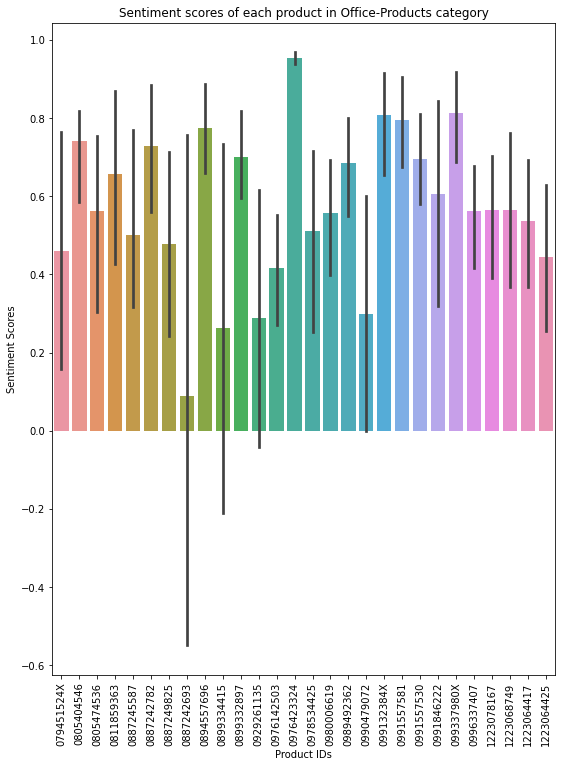

In [9]:
# To create bar graph for each product category:
bar_graph_data = {
    'x': products_id,
    'y': sentiment_scores
}

plt.figure(figsize=(9, 12))
sns.barplot(x='x', y='y', data=bar_graph_data)
plt.title("Sentiment scores of each product in Office-Products category")
plt.xlabel("Product IDs")
plt.ylabel("Sentiment Scores")
plt.xticks(rotation=90);
# plt.savefig('../datasets_output/office_products_dir/office_products_senti_graph.png')

In [10]:
# Create Pandas DataFrame:
data = {
    'user_review': users_review_text,
    'product_id': products_id,
    'sentiment_score': sentiment_scores
}

reviews_df = pd.DataFrame(data)
print(reviews_df)

                                           user_review  product_id  \
0                                       too much fluff  079451524X   
1    I bought this for my daughter (7) to go along ...  079451524X   
2                                        Well written!  079451524X   
3    This book has alot of information and is worth...  079451524X   
4    I'm a biology professor, and I teach microscop...  079451524X   
..                                                 ...         ...   
307  So disappointed with the way the ink does not ...  1223064425   
308  I bought these at a book store and they were r...  1223064417   
309  Fun to use... Colored in a pattern using all o...  1223064425   
310  Flows easily but gloppy, resulting in too much...  1223064425   
311  my 9 year old daughter loves these. She even w...  1223064425   

     sentiment_score  
0             0.0000  
1             0.9370  
2             0.3382  
3             0.2263  
4             0.8027  
..               ... 

In [11]:
# To save the above Pandas DF to CSV:
reviews_df.to_csv('../datasets_output/office_products_dir/office_products_sa_df.csv', index=None)

In [12]:
reviews_df

,user_review,product_id,sentiment_score
0,too much fluff,079451524X,0.0000
1,I bought this for my daughter (7) to go along ...,079451524X,0.9370
2,Well written!,079451524X,0.3382
3,This book has alot of information and is worth...,079451524X,0.2263
4,"I'm a biology professor, and I teach microscop...",079451524X,0.8027
...,...,...,...
307,So disappointed with the way the ink does not ...,1223064425,-0.5256
308,I bought these at a book store and they were r...,1223064417,0.9251
309,Fun to use... Colored in a pattern using all o...,1223064425,0.6597
310,"Flows easily but gloppy, resulting in too much...",1223064425,-0.0516


In [13]:
# To know how many reviews are there for each product_id variable:
print(reviews_df[['product_id']].value_counts())

product_id
0976142503    32
1223078167    27
1223064417    27
0989492362    25
1223064425    21
0980006619    19
099337980X    18
099132384X    15
0991846222    13
0978534425    13
0996337407    12
0887249825    10
0991557581    10
0991557530     9
0899332897     8
0811859363     7
0929261135     5
0887242782     5
079451524X     5
0887245587     4
0894557696     4
0887242693     4
0805474536     4
1223068749     4
0899334415     4
0805404546     3
0990479072     2
0976423324     2
dtype: int64


In [14]:
# To know number of products in office_products category:
print("Number of products in Office-Products category:", len(reviews_df[['product_id']].value_counts()))

Number of products in Office-Products category: 28


In [15]:
# To compute the average (mean) of each product's sentiment score:
sentiment_avg_score = reviews_df.groupby('product_id').mean()[['sentiment_score']]  # returns df object

In [16]:
print(type(sentiment_avg_score))

<class 'pandas.core.frame.DataFrame'>


In [17]:
print(sentiment_avg_score)

            sentiment_score
product_id                 
079451524X         0.460840
0805404546         0.740367
0805474536         0.563175
0811859363         0.657171
0887242693         0.088275
0887242782         0.729020
0887245587         0.499850
0887249825         0.478710
0894557696         0.773800
0899332897         0.701275
0899334415         0.261700
0929261135         0.287820
0976142503         0.415106
0976423324         0.953700
0978534425         0.509777
0980006619         0.555789
0989492362         0.684516
0990479072         0.299700
099132384X         0.806927
0991557530         0.694611
0991557581         0.794590
0991846222         0.606069
099337980X         0.812139
0996337407         0.562758
1223064417         0.535322
1223064425         0.444671
1223068749         0.564625
1223078167         0.563848


In [18]:
# Rounding off average scores:
print(sentiment_avg_score.round({'sentiment_score': 2}) * 100)

            sentiment_score
product_id                 
079451524X             46.0
0805404546             74.0
0805474536             56.0
0811859363             66.0
0887242693              9.0
0887242782             73.0
0887245587             50.0
0887249825             48.0
0894557696             77.0
0899332897             70.0
0899334415             26.0
0929261135             29.0
0976142503             42.0
0976423324             95.0
0978534425             51.0
0980006619             56.0
0989492362             68.0
0990479072             30.0
099132384X             81.0
0991557530             69.0
0991557581             79.0
0991846222             61.0
099337980X             81.0
0996337407             56.0
1223064417             54.0
1223064425             44.0
1223068749             56.0
1223078167             56.0


### Summary:

> - I have done the EDA to understand the dataset to perform Sentiment Analysis.
> - From this Sentiment Analysis, helps to determine how each product or its sellers are performing:
    - product ids such as 0887242693, 0899334415 and 0929261135 have received both positive and non-positive sentiment reactions from the bar graph.
    - The above 'sentiment_avg_score' computation shows information such as which products are doing well, below average or above average. 
> - These analysis will help understand the sales pattern and to further improvise on the business/sales to meet the KPIs.
> - This leads to the scope to build Text Classifier model for analysing the sentiment of the products review to help keep track of the business!